<a href="https://colab.research.google.com/github/Jio-Kim/ML-DL/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 선형회귀

In [29]:
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 데이터 만들기
- x : 0~10
- y : x + 임의의 값

In [40]:
X = np.linspace(0, 10, 10)
Y = X + np.random.randn(*X.shape)

### 데이터 조회
- 임의로 생성된 데이터 조회
- y=ax라는 식을 통해 모든 데이터를 통과하는 직선은 구할 수 없음
- 선형회귀를 사용함으로써 모든 데이터를 통과하지는 못하지만 가장 적절하게 근사값을 구할 수 있는 a찾기

In [41]:
for x,y in zip(X,Y):
  print((round(x,1), round(y,1)))

(0.0, -0.9)
(1.1, 1.0)
(2.2, 1.2)
(3.3, 3.9)
(4.4, 5.1)
(5.6, 6.5)
(6.7, 6.4)
(7.8, 8.4)
(8.9, 9.3)
(10.0, 9.9)


### 선형회귀 모델 만들기
- 케라스의 Sequential을 사용해 선형회귀 모델 만들기
- 모델의 입력은 단순히 x하나이므로 input_dim을 1로 설정
- 모델 출력 역시 단순히 y하나이므로 units를 1로 설정
- activation 함수는 linear로 설정해 선형성 유지
- y=ax+b일 경우 use_bias = True
  - 지금 경우에서는 y=ax로 가정하였으므로 use_bias = False

In [42]:
# 선형회귀 모델
model = Sequential()
model.add(Dense(input_dim = 1, units = 1, activation = 'linear', use_bias = False))

In [43]:
# 모델 학습하기 위한 방법 설정
# 이론과 마찬가지로 경사하강법으로 평균제곱오차를 줄이는 방법으로 모델 학습
# lr = 0.01은 학습률을 0.01로 설정
# 너무 작을 경우 학습 속도 너무 느리고, 너무 크면 학습 제대로 안될 수 있음

In [44]:
# 경사하강법
sgd = optimizers.SGD(lr = 0.05)
model.compile(optimizer = 'sgd', loss = 'mse')

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [45]:
weights = model.layers[0].get_weights()
w = weights[0][0][0]
print('initial a is : ' + str(w))

initial a is : 0.52345073


최초 a에는 무작위로 적은 수치의 값 설정되어 있음, 학습을 통해 가장 알맞은 a찾아야 함

### 선형회귀 모델 학습
- 총 10개의 데이터가 있으므로 배치 사이즈를 10으로 설정해 10개의 데이터에 대한 평균 제곱 오차를 사용한 학습 진행
- epochs = 10으로 설정해 10번 반복학습 진행해 최적의 a찾기

In [46]:
model.fit(X,Y, batch_size = 10, epochs = 10, verbose = 1)

Epoch 1/10
1/1 [==============================] - 0s 228ms/step - loss: 9.7458
Epoch 2/10
1/1 [==============================] - 0s 12ms/step - loss: 1.1678
Epoch 3/10
1/1 [==============================] - 0s 9ms/step - loss: 0.4147
Epoch 4/10
1/1 [==============================] - 0s 9ms/step - loss: 0.3486
Epoch 5/10
1/1 [==============================] - 0s 11ms/step - loss: 0.3428
Epoch 6/10
1/1 [==============================] - 0s 12ms/step - loss: 0.3423
Epoch 7/10
1/1 [==============================] - 0s 13ms/step - loss: 0.3422
Epoch 8/10
1/1 [==============================] - 0s 10ms/step - loss: 0.3422
Epoch 9/10
1/1 [==============================] - 0s 8ms/step - loss: 0.3422
Epoch 10/10
1/1 [==============================] - 0s 8ms/step - loss: 0.3422


- 실행 로그를 통해 손실(loss)이 점차 줄어들고 있음을 확인 가능
- 손실이 줄어든다는 말의 의미는 평균 제곱 편차가 줄어든다는 것이며, 이는 a가 점차적으로 데이터에 적합한 값으로 설정돼 가고 있음을 의미
- 손실에 변화가 없는것도 확인 가능
  - 이미 7번째 학습에서 평균 제곱 오차를 최소화하는 a를 찾은 것으로 해석 가능

In [47]:
# 학습된 선형 모델의 기울기(w) 조회
weights = model.layers[0].get_weights()
w = weights[0][0][0]

print('trained w is : ' + str(w))

trained w is : 1.0404185


### 시각화

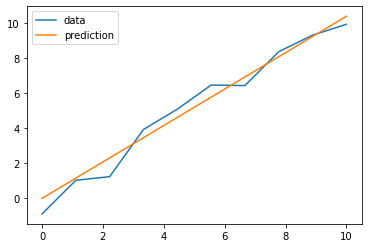

In [48]:
plt.plot(X,Y, label = 'data')
plt.plot(X, w*X, label = 'prediction')
plt.legend()
plt.show()